In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


### Question-2

In [31]:
def getNewTimes():
    MeatTimes, UserTimes, SysTimes, CPUTimes = [], [], [], []
    with open("output.txt") as f:
        lines = f.readlines()
        for i in range(0, len(lines), 2):
            MeatTimes.append(float(lines[i][:-1]))
            UserTimes.append(float(lines[i+1].split(" ")[2][:-1]))
            SysTimes.append(float(lines[i+1].split(" ")[4][:-1]))
            CPUTimes.append(float(lines[i+1].split(" ")[2][:-1]) + float(lines[i+1].split(" ")[4][:-1]))
    
    return MeatTimes, UserTimes, SysTimes, CPUTimes

In [27]:
MeatTime_py_int, UserTime_py_int, SysTime_py_int, CPUTimes_py_int = getNewTimes()

In [60]:
print(MeatTime_py_int)
print(UserTime_py_int)
print(SysTime_py_int)
print(CPUTimes_py_int)

[0.014581000000000004, 0.12002, 0.9740260000000001, 8.176262000000001, 81.15083]
[0.06, 0.19, 1.05, 8.26, 81.27]
[0.02, 0.02, 0.02, 0.02, 0.06]
[0.08, 0.21, 1.07, 8.28, 81.33]


In [29]:
MeatTime_py_float, UserTime_py_float, SysTime_py_float, CPUTimes_py_float = getNewTimes()

In [61]:
print(MeatTime_py_float)
print(UserTime_py_float)
print(SysTime_py_float)
print(CPUTimes_py_float)

[0.013675999999999994, 0.10387700000000001, 0.8457640000000001, 7.45963, 69.344414]
[0.08, 0.17, 0.92, 7.54, 69.45]
[0.02, 0.02, 0.02, 0.02, 0.06]
[0.1, 0.19, 0.9400000000000001, 7.56, 69.51]


In [32]:
MeatTime_cpp_float, UserTime_cpp_float, SysTime_cpp_float, CPUTimes_cpp_float = getNewTimes()

In [62]:
print(MeatTime_cpp_float)
print(UserTime_cpp_float)
print(SysTime_cpp_float)
print(CPUTimes_cpp_float)

[0.002582, 0.02764, 0.131547, 0.821069, 7.63014]
[0.0, 0.03, 0.15, 0.87, 7.75]
[0.0, 0.0, 0.0, 0.0, 0.01]
[0.0, 0.03, 0.15, 0.87, 7.76]


In [34]:
MeatTime_cpp_int, UserTime_cpp_int, SysTime_cpp_int, CPUTimes_cpp_int = getNewTimes()

In [63]:
print(MeatTime_cpp_int)
print(UserTime_cpp_int)
print(SysTime_cpp_int)
print(CPUTimes_cpp_int)

[0.005354, 0.030016, 0.178672, 1.40492, 10.4468]
[0.01, 0.04, 0.21, 1.48, 10.67]
[0.0, 0.0, 0.0, 0.0, 0.01]
[0.01, 0.04, 0.21, 1.48, 10.68]


In [79]:
matrix = ["64", "128", "256", "512", "1024"]

In [85]:
import pandas as pd

def create_time_dataframe(SysTime_cpp_int, CPUTimes_cpp_int,label,matrix=matrix):
    """
    This function creates a pandas DataFrame from the extracted time values.
    
    Parameters:
        SysTime_cpp_int (list): List of system times for each matrix size.
        CPUTimes_cpp_int (list): List of total CPU times for each matrix size.
    
    Returns:
        df (pandas.DataFrame): A DataFrame containing the meat, user, system, and total CPU times.
    """
    
    # Create a dictionary with the data
    data = {
        f'System Time {label}(s)': SysTime_cpp_int,
        f'Total CPU Time {label}(s)': CPUTimes_cpp_int
    }
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(data,index=matrix)
    
    return df


In [95]:
df_cpp_int = create_time_dataframe(SysTime_cpp_int,CPUTimes_cpp_int, "C++ int data-type")
df_cpp_int

,System Time C++ int data-type(s),Total CPU Time C++ int data-type(s)
64,0.00,0.01
128,0.00,0.04
256,0.00,0.21
512,0.00,1.48
1024,0.01,10.68


In [96]:
df_cpp_float = create_time_dataframe(SysTime_cpp_float,CPUTimes_cpp_float, "C++ float data-type")
df_cpp_float

,System Time C++ float data-type(s),Total CPU Time C++ float data-type(s)
64,0.00,0.00
128,0.00,0.03
256,0.00,0.15
512,0.00,0.87
1024,0.01,7.76


In [97]:
df_py_int = create_time_dataframe(SysTime_py_int,CPUTimes_py_int, "Python int data-type")
df_py_int

,System Time Python int data-type(s),Total CPU Time Python int data-type(s)
64,0.02,0.08
128,0.02,0.21
256,0.02,1.07
512,0.02,8.28
1024,0.06,81.33


In [98]:
df_py_float = create_time_dataframe(SysTime_py_float,CPUTimes_py_float, "Python float data-type")
df_py_float

,System Time Python float data-type(s),Total CPU Time Python float data-type(s)
64,0.02,0.10
128,0.02,0.19
256,0.02,0.94
512,0.02,7.56
1024,0.06,69.51


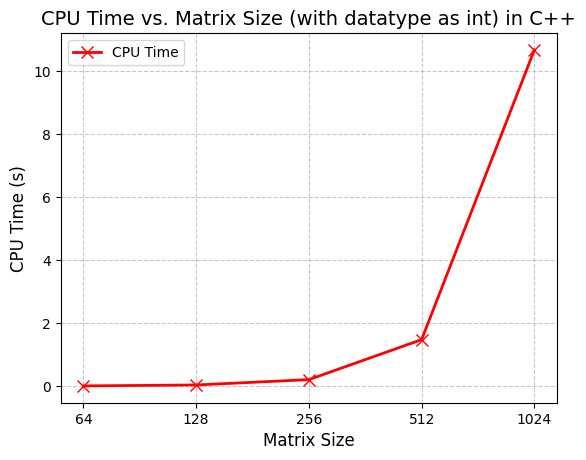

In [41]:
plt.plot(matrix, CPUTimes_cpp_int, color='red', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("CPU Time vs. Matrix Size (with datatype as int) in C++", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("CPU Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


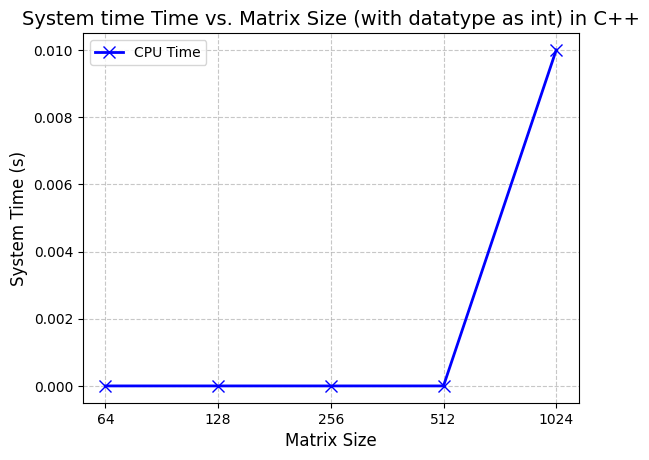

In [42]:
plt.plot(matrix, SysTime_cpp_int, color='blue', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("System time Time vs. Matrix Size (with datatype as int) in C++", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("System Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


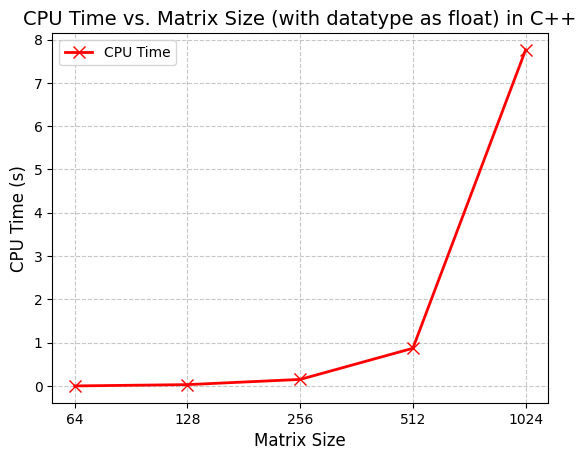

In [43]:
plt.plot(matrix, CPUTimes_cpp_float, color='red', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("CPU Time vs. Matrix Size (with datatype as float) in C++", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("CPU Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


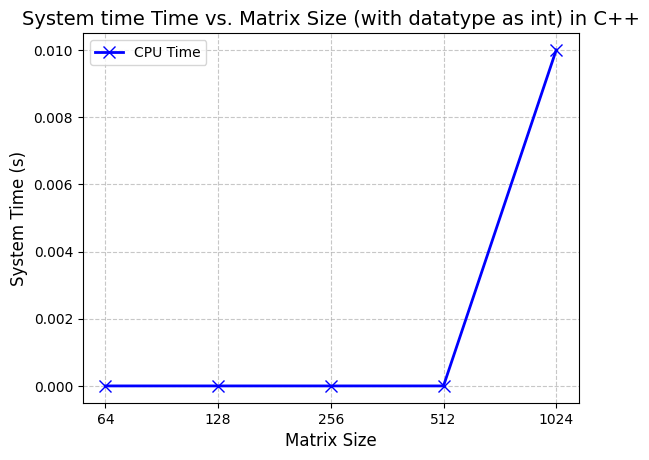

In [44]:
plt.plot(matrix, SysTime_cpp_float, color='blue', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("System time Time vs. Matrix Size (with datatype as int) in C++", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("System Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


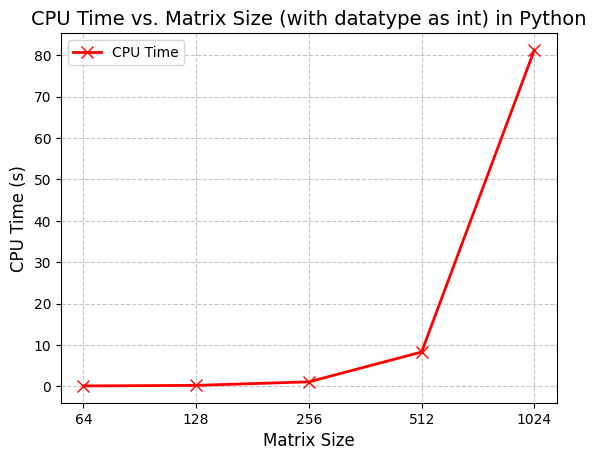

In [47]:
plt.plot(matrix, CPUTimes_py_int, color='red', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("CPU Time vs. Matrix Size (with datatype as int) in Python", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("CPU Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


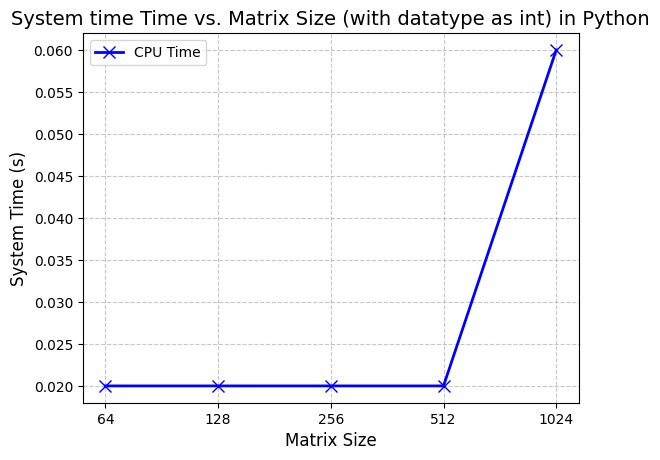

In [46]:
plt.plot(matrix, SysTime_py_int, color='blue', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("System time Time vs. Matrix Size (with datatype as int) in Python", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("System Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


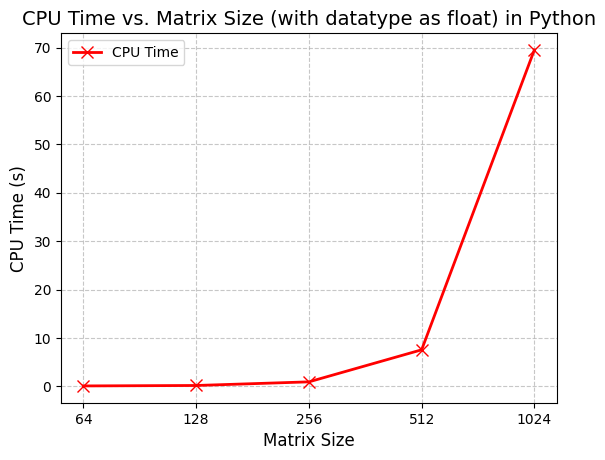

In [48]:
plt.plot(matrix, CPUTimes_py_float, color='red', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("CPU Time vs. Matrix Size (with datatype as float) in Python", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("CPU Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


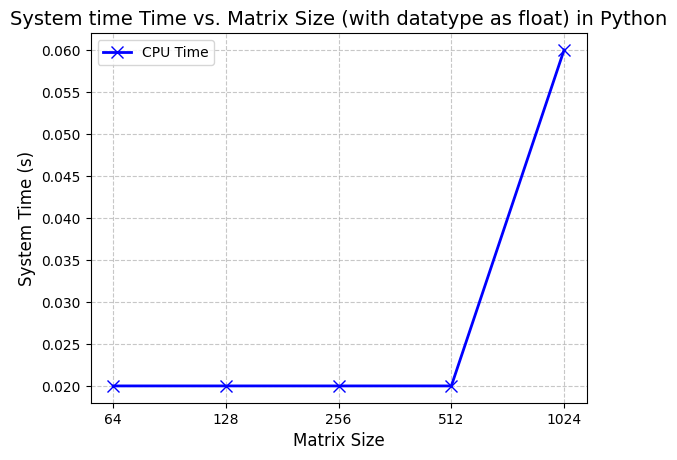

In [49]:
plt.plot(matrix, SysTime_py_float, color='blue', marker='x', markersize=8, linestyle='-', linewidth=2, label='CPU Time')
plt.title("System time Time vs. Matrix Size (with datatype as float) in Python", fontsize=14)
plt.xlabel("Matrix Size", fontsize=12)
plt.ylabel("System Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [55]:
import matplotlib.pyplot as plt

def calculate_meat_time_proportion(MeatTime_cpp_int, CPUTimes_cpp_int, lan,val,plot_results=True):
    """
    This function calculates the proportion of meat time with respect to total CPU time.
    
    Parameters:
        MeatTime_cpp_int (list): A list of meat times for each matrix size.
        CPUTimes_cpp_int (list): A list of total CPU times for each matrix size.
        plot_results (bool): Whether to plot the results. Default is True.
    
    Returns:
        meat_proportions (list): A list of meat time proportions for each matrix size.
    """
    meat_proportions = []
    
    # Iterate over all the data points
    for i in range(len(MeatTime_cpp_int)):
        # Ensure the total CPU time is non-zero to avoid division by zero
        if CPUTimes_cpp_int[i] > 0:
            proportion = (MeatTime_cpp_int[i] / CPUTimes_cpp_int[i]) * 100
            meat_proportions.append(proportion)
        else:
            meat_proportions.append(0)  # In case of 0 CPU time, just append 0 proportion
    
    # Print the results
    for i, proportion in enumerate(meat_proportions):
        print(f"Matrix Size: {i}, Meat Time Proportion: {proportion:.2f}%")
    
    # Optionally plot the proportions
    if plot_results:
        plt.plot(matrix, meat_proportions, marker='x', color='blue', linestyle='-', linewidth=2)
        plt.title(f"Meat Time Proportion of {lan} with {val} datatype vs. Matrix Size")
        plt.xlabel("Matrix Size")
        plt.ylabel("Meat Time Proportion (%)")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    
    return meat_proportions


Matrix Size: 0, Meat Time Proportion: 53.54%
Matrix Size: 1, Meat Time Proportion: 75.04%
Matrix Size: 2, Meat Time Proportion: 85.08%
Matrix Size: 3, Meat Time Proportion: 94.93%
Matrix Size: 4, Meat Time Proportion: 97.82%


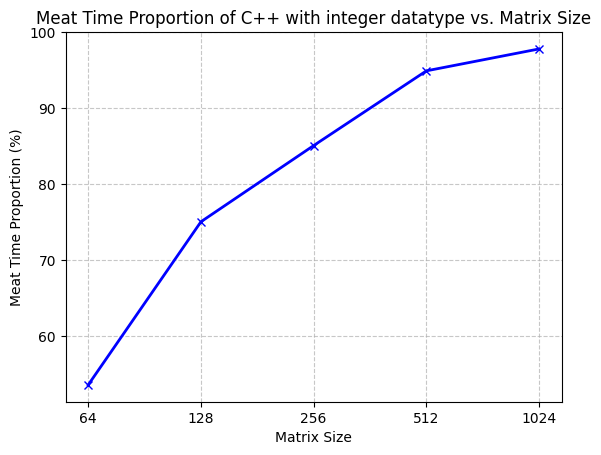

[53.54,
 75.03999999999999,
 85.08190476190475,
 94.92702702702702,
 97.81647940074907]

In [56]:
calculate_meat_time_proportion(MeatTime_cpp_int,CPUTimes_cpp_int,"C++","integer")

Matrix Size: 0, Meat Time Proportion: 0.00%
Matrix Size: 1, Meat Time Proportion: 92.13%
Matrix Size: 2, Meat Time Proportion: 87.70%
Matrix Size: 3, Meat Time Proportion: 94.38%
Matrix Size: 4, Meat Time Proportion: 98.33%


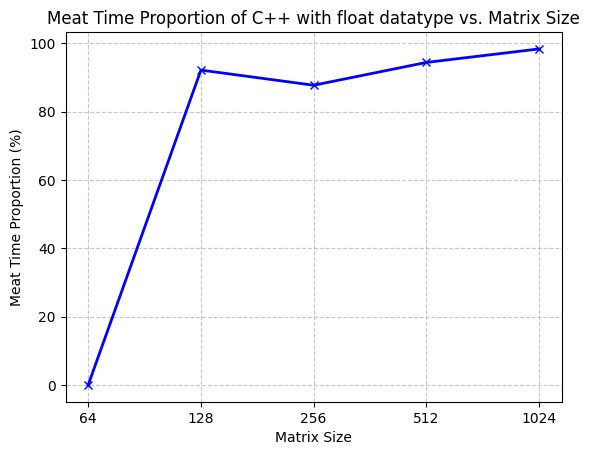

[0, 92.13333333333334, 87.698, 94.37574712643679, 98.32654639175257]

In [57]:
calculate_meat_time_proportion(MeatTime_cpp_float,CPUTimes_cpp_float,"C++","float")

Matrix Size: 0, Meat Time Proportion: 18.23%
Matrix Size: 1, Meat Time Proportion: 57.15%
Matrix Size: 2, Meat Time Proportion: 91.03%
Matrix Size: 3, Meat Time Proportion: 98.75%
Matrix Size: 4, Meat Time Proportion: 99.78%


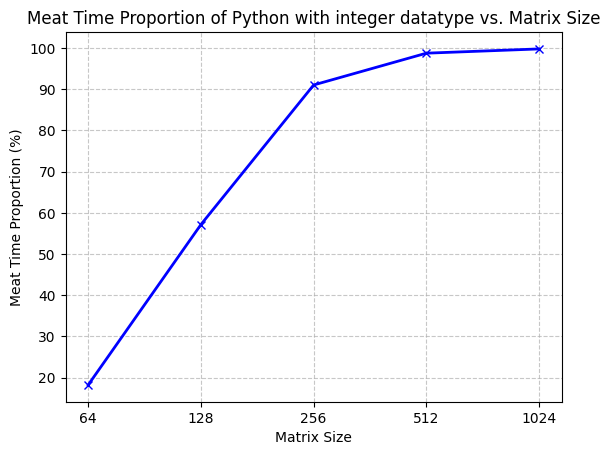

[18.226250000000004,
 57.15238095238095,
 91.03046728971962,
 98.74712560386476,
 99.77969998770442]

In [58]:
calculate_meat_time_proportion(MeatTime_py_int,CPUTimes_py_int,"Python","integer")

Matrix Size: 0, Meat Time Proportion: 13.68%
Matrix Size: 1, Meat Time Proportion: 54.67%
Matrix Size: 2, Meat Time Proportion: 89.97%
Matrix Size: 3, Meat Time Proportion: 98.67%
Matrix Size: 4, Meat Time Proportion: 99.76%


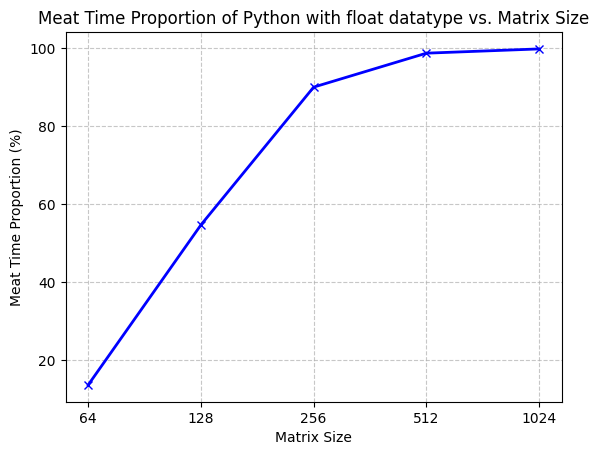

[13.675999999999993,
 54.6721052631579,
 89.97489361702128,
 98.67235449735449,
 99.76178103869945]

In [59]:
calculate_meat_time_proportion(MeatTime_py_float,CPUTimes_py_float,"Python","float")

In [100]:
import matplotlib.pyplot as plt

def compare_performance(df_cpp, df_py, matrix_sizes,label):
    """
    This function compares the performance of C++ and Python based on system and CPU times.
    
    Parameters:
        df_cpp (DataFrame): Performance data for C++.
        df_py (DataFrame): Performance data for Python.
        matrix_sizes (list): List of matrix sizes.
    """
    #System Time C++ float data-type(s)
    # Plot System Time comparison
    plt.figure(figsize=(10, 6))
    plt.plot(matrix_sizes, df_cpp[f'System Time C++ {label} data-type(s)'], label='C++ System Time', marker='o', color='red')
    plt.plot(matrix_sizes, df_py[f'System Time Python {label} data-type(s)'], label='Python System Time', marker='o', color='blue')
    plt.title(f'System Time Comparison between C++ and Python with {label} data-type')
    plt.xlabel('Matrix Size')
    plt.ylabel('System Time (s)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Plot Total CPU Time comparison
    plt.figure(figsize=(10, 6))
    plt.plot(matrix_sizes, df_cpp[f'Total CPU Time C++ {label} data-type(s)'], label='C++ Total CPU Time', marker='o', color='red')
    plt.plot(matrix_sizes, df_py[f'Total CPU Time Python {label} data-type(s)'], label='Python Total CPU Time', marker='o', color='blue')
    plt.title(f'Total CPU Time Comparison between C++ and Python with {label} data-type')
    plt.xlabel('Matrix Size')
    plt.ylabel('Total CPU Time (s)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



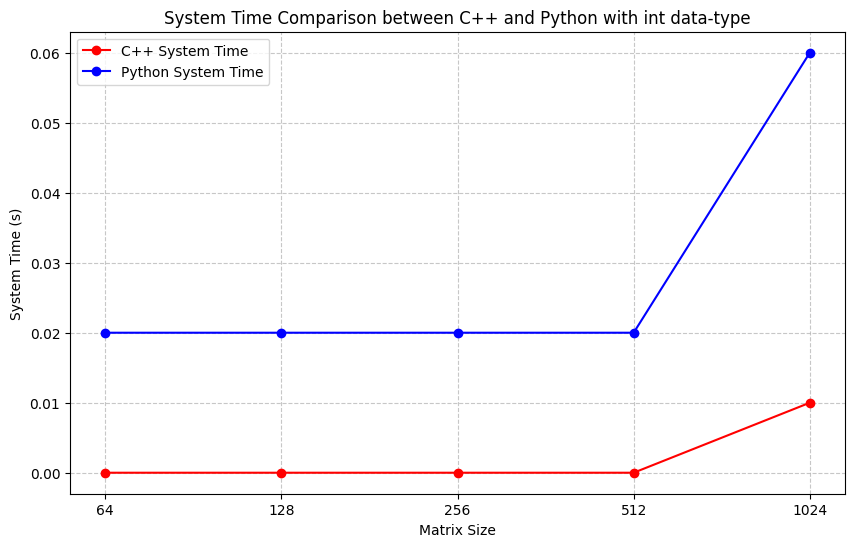

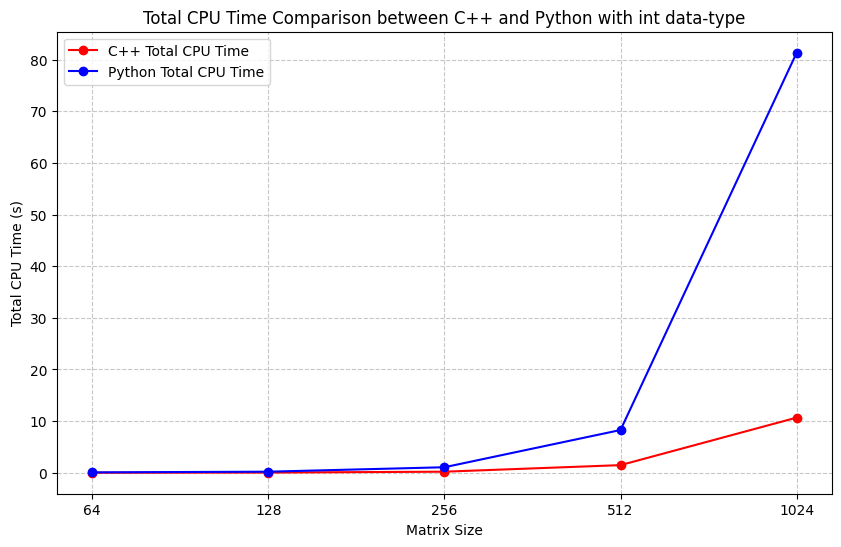

In [102]:
compare_performance(df_cpp_int,df_py_int,matrix,"int")

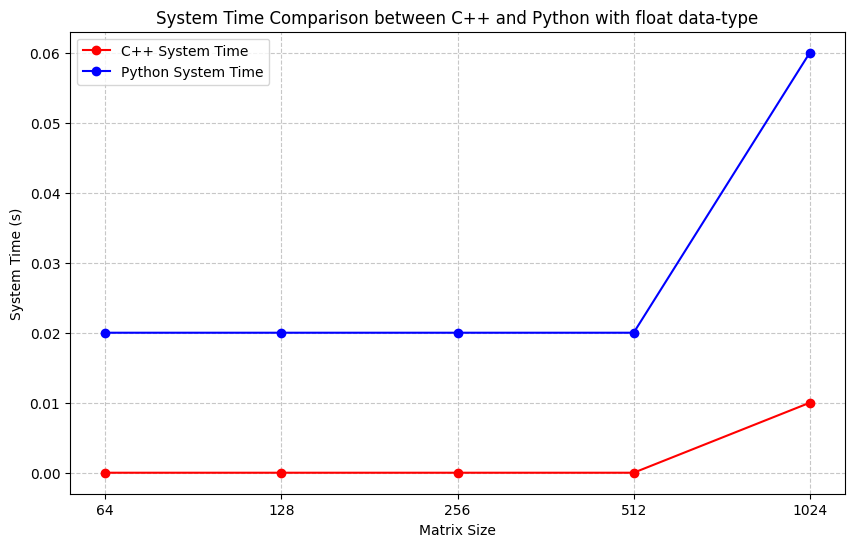

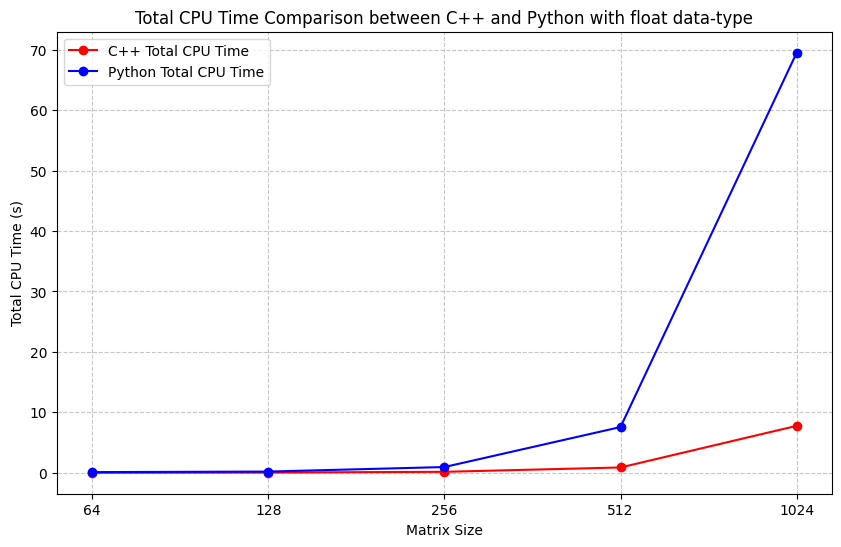

In [104]:
compare_performance(df_cpp_float,df_py_float,matrix,"float")

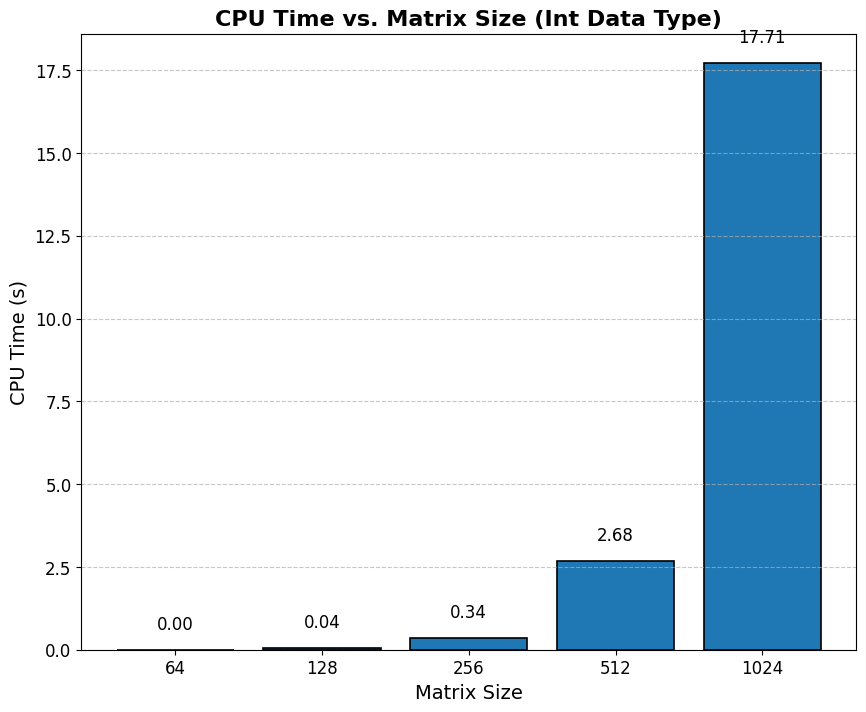

[0.004160333333333334,
 0.04330200000000001,
 0.34135033333333337,
 2.6801436666666665,
 17.713814]

In [6]:
import matplotlib.pyplot as plt

size64int = [0.002831, 0.004733, 0.004917]
size128int = [0.039973, 0.057147, 0.032786]
size256int = [0.263376, 0.523780, 0.236895]
size512int = [1.661190, 4.089446, 2.289795]
size1024int = [20.418671, 16.686725, 16.036046]

time64 = sum(size64int)/3
time128 = sum(size128int)/3
time256 = sum(size256int)/3
time512 = sum(size512int)/3
time1024 = sum(size1024int)/3
matrix_sizes = ["64", "128", "256", "512", "1024"]
cpu_times = [time64, time128, time256, time512, time1024]
plt.figure(figsize=(10, 8))  # Increase figure size for better readability

# Create bar plot with improved aesthetics
plt.bar(matrix_sizes, cpu_times, color='#1f77b4', edgecolor='black', linewidth=1.2)

# Add titles and labels with custom fonts and sizes
plt.title("CPU Time vs. Matrix Size (Int Data Type)", fontsize=16, fontweight='bold')
plt.xlabel("Matrix Size", fontsize=14)
plt.ylabel("CPU Time (s)", fontsize=14)

# Add grid for easier visualization of data
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its corresponding value
for i, v in enumerate(cpu_times):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()
cpu_times

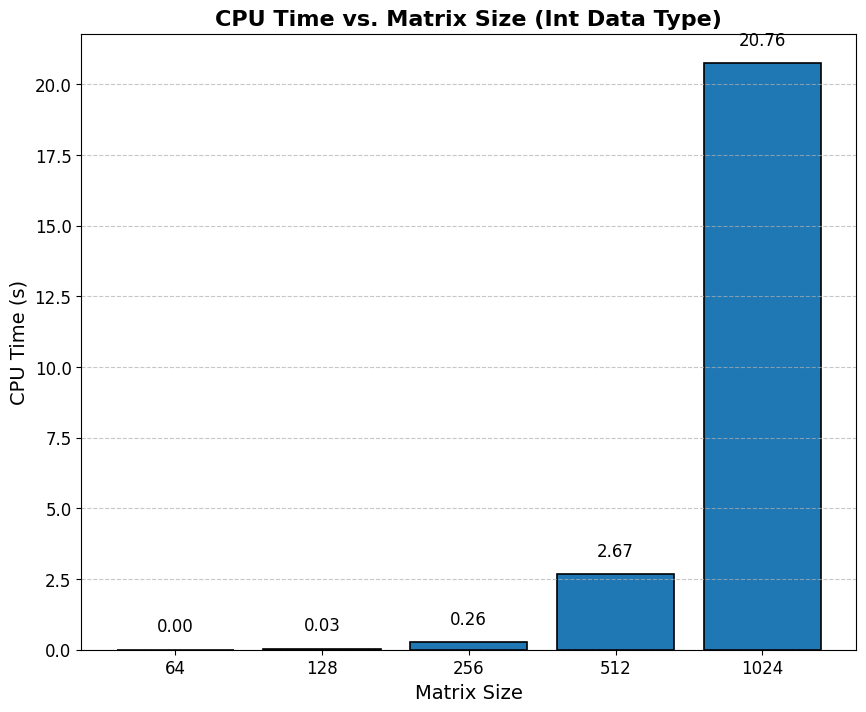

[0.003560246666666667,
 0.0293867,
 0.2608796666666667,
 2.6727499999999993,
 20.755233333333333]

In [7]:
size64float = [0.00347946, 0.00348871, 0.00371257]
size128float = [0.0278937, 0.0326685, 0.0275979]
size256float = [0.248471, 0.304888, 0.22928]
size512float = [2.53895, 3.31369, 2.16561]
size1024float = [22.3805, 21.5674, 18.3178]

time64float = sum(size64float)/3
time128float = sum(size128float)/3
time256float = sum(size256float)/3
time512float = sum(size512float)/3
time1024float = sum(size1024float)/3

time64 = sum(size64float)/3
time128 = sum(size128float)/3
time256 = sum(size256float)/3
time512 = sum(size512float)/3
time1024 = sum(size1024float)/3
matrix_sizes = ["64", "128", "256", "512", "1024"]
cpu_times = [time64, time128, time256, time512, time1024]
plt.figure(figsize=(10, 8))  # Increase figure size for better readability

# Create bar plot with improved aesthetics
plt.bar(matrix_sizes, cpu_times, color='#1f77b4', edgecolor='black', linewidth=1.2)

# Add titles and labels with custom fonts and sizes
plt.title("CPU Time vs. Matrix Size (Int Data Type)", fontsize=16, fontweight='bold')
plt.xlabel("Matrix Size", fontsize=14)
plt.ylabel("CPU Time (s)", fontsize=14)

# Add grid for easier visualization of data
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its corresponding value
for i, v in enumerate(cpu_times):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()
cpu_times

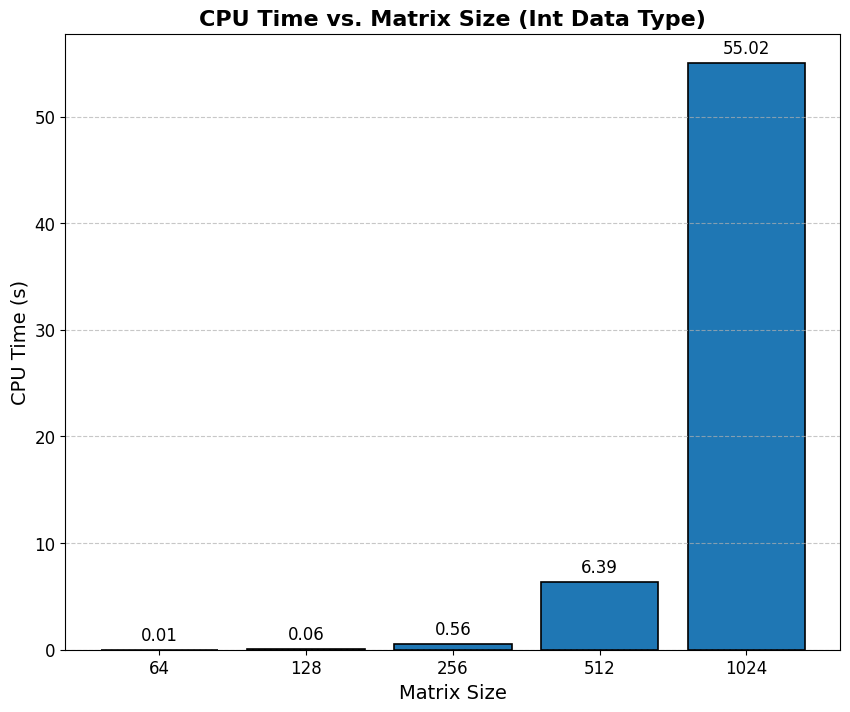

[0.005208333333333333,
 0.0625,
 0.5572916666666666,
 6.385416666666667,
 55.015625]

In [8]:
Size64int = [0.015625000, 0.000000000, 0.000000000]
Size128int = [0.078125000, 0.046875000, 0.062500000]
Size256int = [0.750000000, 0.515625000, 0.406250000]
Size512int = [6.484375000, 7.062500000, 5.609375000]
Size1024int = [52.828125000, 49.546875000, 62.671875000]

time64_int_Py = sum(Size64int)/3
time128_int_Py = sum(Size128int)/3
time256_int_Py = sum(Size256int)/3
time512_int_Py = sum(Size512int)/3
time1024_int_Py = sum(Size1024int)/3

matrix_sizes = ["64", "128", "256", "512", "1024"]
cpu_times = [time64_int_Py, time128_int_Py, time256_int_Py, time512_int_Py, time1024_int_Py]
plt.figure(figsize=(10, 8))  # Increase figure size for better readability

# Create bar plot with improved aesthetics
plt.bar(matrix_sizes, cpu_times, color='#1f77b4', edgecolor='black', linewidth=1.2)

# Add titles and labels with custom fonts and sizes
plt.title("CPU Time vs. Matrix Size (Int Data Type)", fontsize=16, fontweight='bold')
plt.xlabel("Matrix Size", fontsize=14)
plt.ylabel("CPU Time (s)", fontsize=14)

# Add grid for easier visualization of data
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its corresponding value
for i, v in enumerate(cpu_times):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()
cpu_times

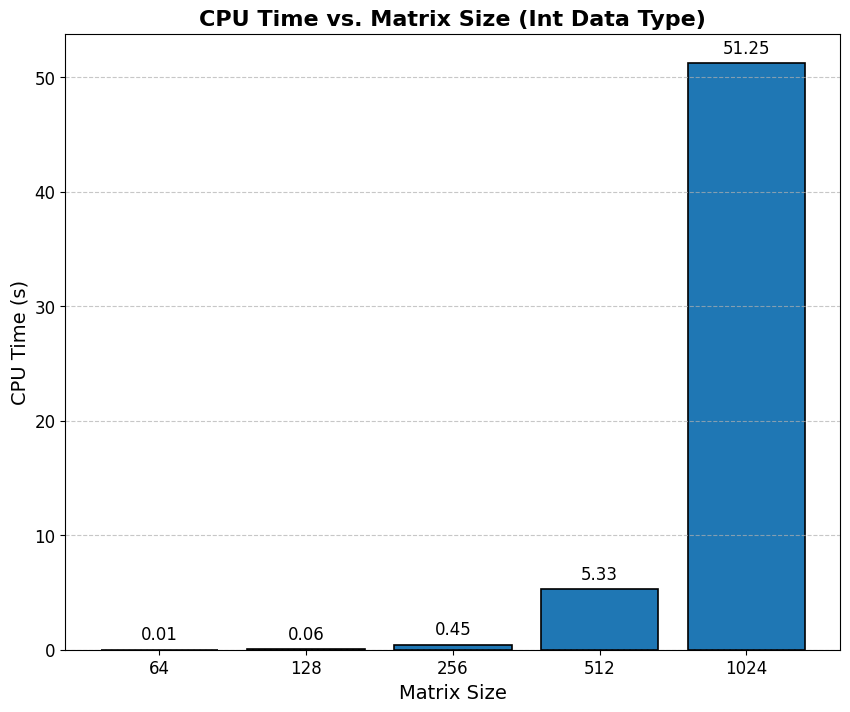

[0.010416666666666666, 0.0625, 0.453125, 5.333333333333333, 51.25]

In [14]:
Size64int = [0.000000000, 0.031250000, 0.000000000]
Size128int = [0.015625000, 0.093750000, 0.078125000]
Size256int = [0.343750000, 0.500000000, 0.515625000]
Size512int = [6.921875000, 3.843750000, 5.234375000]
Size1024int = [40.718750000, 47.843750000, 65.187500000]

time64_int_Py = sum(Size64int)/3
time128_int_Py = sum(Size128int)/3
time256_int_Py = sum(Size256int)/3
time512_int_Py = sum(Size512int)/3
time1024_int_Py = sum(Size1024int)/3

matrix_sizes = ["64", "128", "256", "512", "1024"]
cpu_times = [time64_int_Py, time128_int_Py, time256_int_Py, time512_int_Py, time1024_int_Py]
plt.figure(figsize=(10, 8))  # Increase figure size for better readability

# Create bar plot with improved aesthetics
plt.bar(matrix_sizes, cpu_times, color='#1f77b4', edgecolor='black', linewidth=1.2)

# Add titles and labels with custom fonts and sizes
plt.title("CPU Time vs. Matrix Size (Int Data Type)", fontsize=16, fontweight='bold')
plt.xlabel("Matrix Size", fontsize=14)
plt.ylabel("CPU Time (s)", fontsize=14)

# Add grid for easier visualization of data
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its corresponding value
for i, v in enumerate(cpu_times):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()
cpu_times

### Question-1

In [10]:
time_recursive = [171.058, 175.534, 169.217]
time_loop = [2.74e-06, 2.56e-06, 2.96e-06]
time_recursion_momo = [7.21e-06, 9.4e-06, 7.011e-06]
time_loop_tab = [5.43e-06, 5.85e-06, 4.64e-06]
time_rec = sum(time_recursive)/3
time_loop = sum(time_loop)/3
time_recursion_momo = sum(time_recursion_momo)/3
time_loop_tab = sum(time_loop_tab)/3

In [13]:
# Gain in performance w.r.t. recursion
gain_rec = 1
gain_loop = (time_rec) / time_loop
gain_recursion_momo = (time_rec) / time_recursion_momo
gain_loop_tab = (time_rec) / time_loop_tab

print(f"Gain in performance w.r.t. recursion: {gain_rec:.2f}")
print(f"Gain in performance w.r.t. loop: {gain_loop:.2f}")
print(f"Gain in performance w.r.t. recursion with memoization: {gain_recursion_momo:.2f}")
print(f"Gain in performance w.r.t. loop with tabulation: {gain_loop_tab:.2f}")



Gain in performance w.r.t. recursion: 1.00
Gain in performance w.r.t. loop: 62446610.17
Gain in performance w.r.t. recursion with memoization: 21836882.44
Gain in performance w.r.t. loop with tabulation: 32400062.81
